In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Algerian_forest_fires_dataset_datanew.csv")

In [4]:
df_copy=df.copy()

In [5]:
df_copy.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df_copy.drop(["Unnamed: 0"],inplace=True,axis=1)

In [7]:
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [8]:
df_copy.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          8
Region           2
dtype: int64

In [9]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [10]:
df_copy['Classes']=df_copy['Classes'].str.strip().str.lower()

In [11]:
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [12]:
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [13]:
df_copy.drop(['day','month','year'],axis=1,inplace=True)

In [14]:
df_copy["Classes"] = df_copy["Classes"].map({"not fire": 0, "fire": 1})


In [15]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [16]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [17]:
##independent and Dependent Features
X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [18]:
X.head()
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)


In [20]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(170, 11) (170,) (73, 11) (73,)


In [21]:
##feature Selection based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,0.528734,0.238873
RH,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.443073,-0.394121
Ws,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,-0.062718,-0.182236
Rain,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.367767,-0.051964
FFMC,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.781730,0.251710
DMC,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.619536,0.210853
DC,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,0.551208,-0.056844
ISI,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.737184,0.290294
BUI,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.616406,0.115434
Classes,0.528734,-0.443073,-0.062718,-0.367767,0.781730,0.619536,0.551208,0.737184,0.616406,1.000000,0.177257


In [22]:
import seaborn as sns

##Check for multicolliniearity- features must not be very high coreelated which leaks info to model

<Axes: >

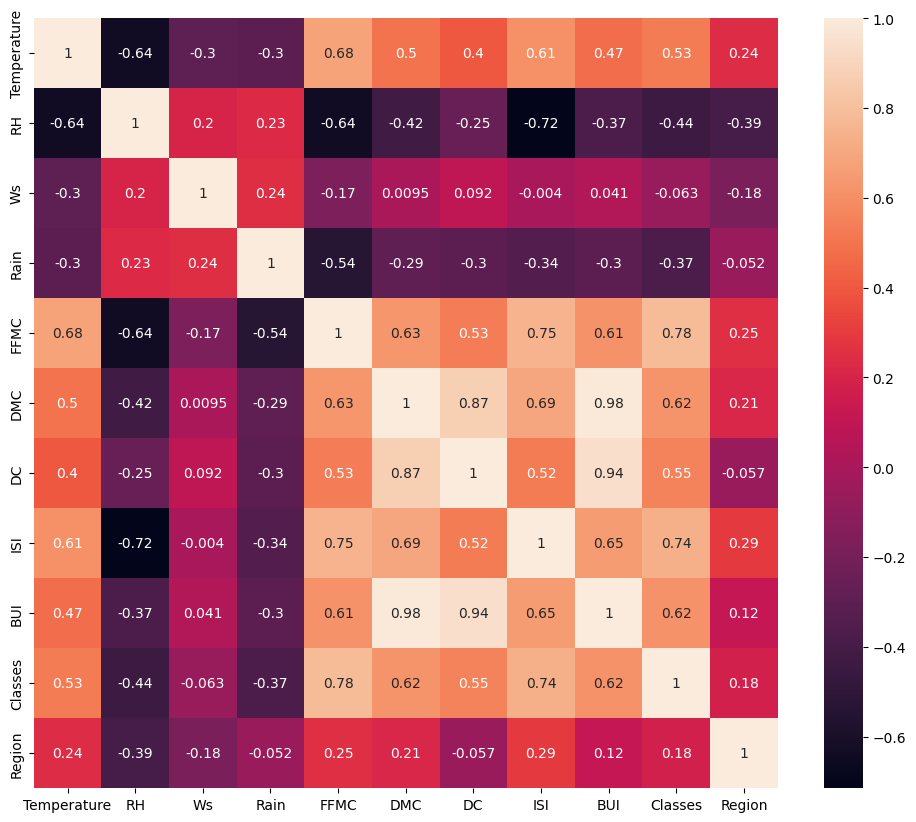

In [23]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [24]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [25]:
#threshold-domain expertise
corr_features=correlation(X_train,0.85)

In [26]:
##drop the features
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

##Features Scaling or Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

##OUTLIER DETECTION 

Text(0.5, 1.0, 'X_train After Scaling')

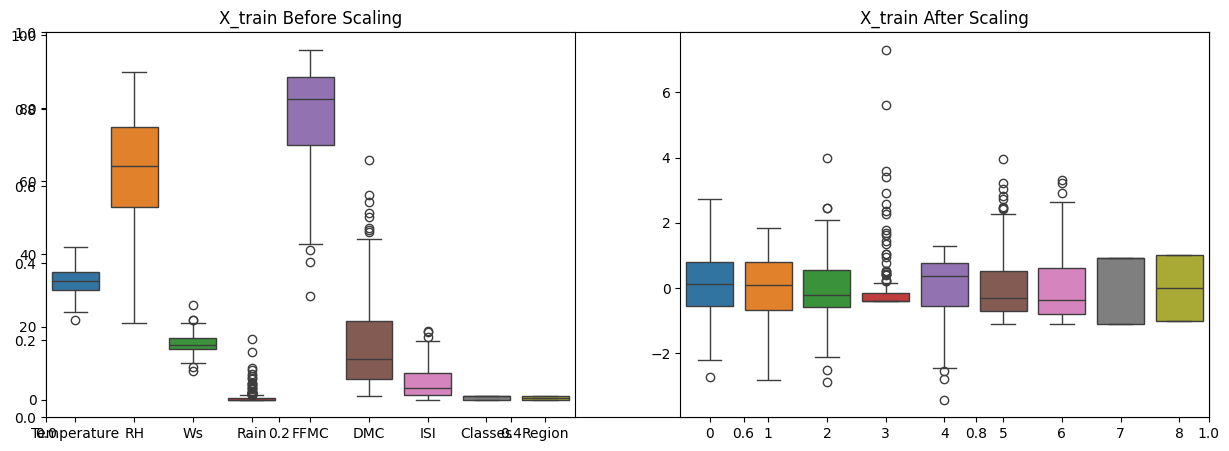

In [28]:
##Box plots
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')


Mean absolute error 0.5648036371485072
R2 score 0.9847206874554418


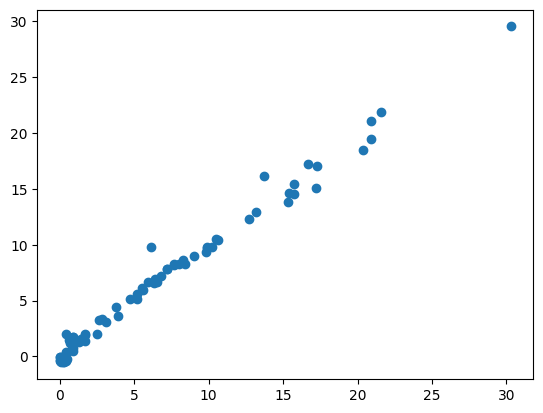

In [29]:
#MOdel training- linear lasso ridge elastic
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)





## Lasso Regression

Mean absolute error 1.1203368882393199
R2 score 0.9511364350928344


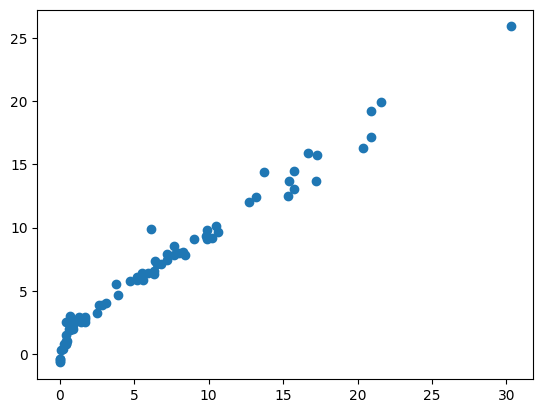

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)



#if r2 score is decressed it does not mean that model is bad may be it imporves overfitting that was earlier

## ridge regression:


Mean absolute error 0.5844876727578021
R2 score 0.9841610358272456


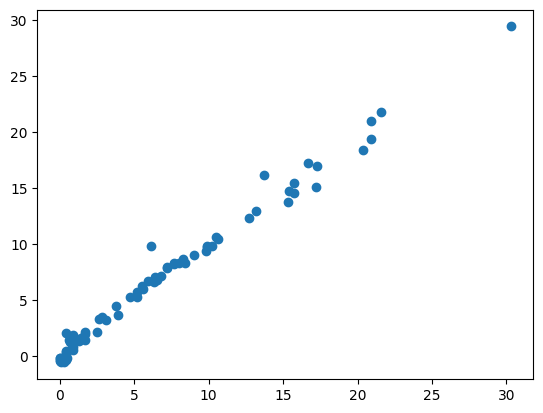

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)


## Elastic Netregression

Mean absolute error 1.855468747971755
R2 score 0.8804077479376988


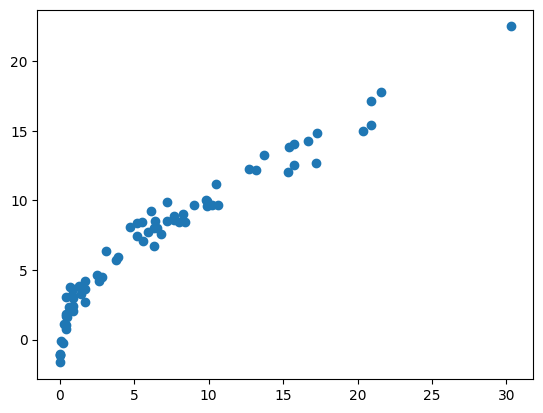

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elasticiii=ElasticNet()
elasticiii.fit(X_train_scaled,y_train)
y_pred=elasticiii.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)


## HyperParamter Tuning

In [33]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.001
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: bool or int, default=FalseAmount of verbosity.",False
,"n_jobs n_jobs: int, default=NoneNumber of CPUs to use during the cross validation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [38]:
y_pred=lassocv.predict(X_test_scaled)

In [36]:
lassocv.alpha_

np.float64(0.05761253346064308)

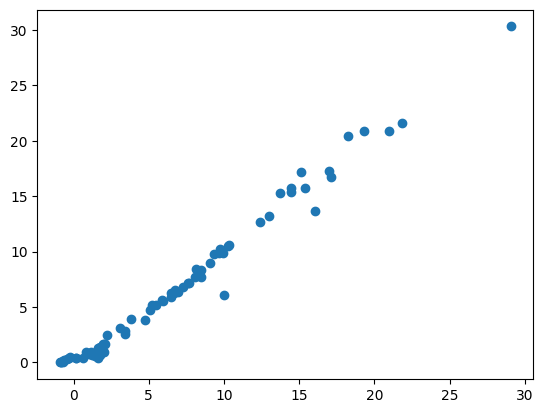

In [39]:
plt.scatter(y_pred,y_test)

In [44]:
train_r2 = lassocv.score(X_train_scaled, y_train)
test_r2  = lassocv.score(X_test_scaled, y_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)

print(train_r2, test_r2)  #train>test overfit both low-underfit else fine good model


Mean absolute error 0.6279134211002095
R2 score 0.9824854285695882
0.9678828788500011 0.9824854285695882


In [37]:
lassocv.mse_path_

array([[50.65386968, 76.54197718, 42.60540011, 85.19903601, 37.22447771],
       [44.75111814, 74.82132255, 38.341692  , 85.19903601, 33.05643554],
       [39.36934038, 67.35349762, 32.91718118, 77.16947646, 28.98441557],
       [34.66809152, 60.76849885, 28.30179163, 70.00628728, 25.07891899],
       [30.56005987, 54.39656706, 24.38332378, 63.69553448, 21.70030699],
       [26.96916466, 47.86216351, 21.06462063, 58.13161794, 18.77862509],
       [23.82945553, 42.15575307, 18.26138649, 53.22232605, 16.25301222],
       [21.08318369, 37.17090521, 15.90095328, 46.89293347, 14.07124316],
       [18.68014904, 32.81473426, 13.92043855, 41.32635877, 12.18732916],
       [16.57661964, 29.00744813, 12.26540003, 36.4658746 , 10.56155236],
       [14.73438066, 25.67846082, 10.88893934, 32.22081976,  9.15943046],
       [13.12047322, 22.76665973,  9.75047302, 28.5122238 ,  7.95103045],
       [11.70583482, 20.21881242,  8.81511714, 25.27132199,  6.9102242 ],
       [10.46524798, 17.98854548,  8.0

## SIMILARLY CV FOR ALL MODELS